# Section B. Prediction Uncertainty with Bootstrapping
## Question 3 [Bootstrapping, 20 Marks]

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from scipy.spatial import distance
import random

In [35]:
trainT1B = pd.read_table('assessments_datasets/Task1B_train.csv', sep=",")
testT1B = pd.read_table('assessments_datasets/Task1B_test.csv', sep=",")

In [36]:
trainData = trainT1B.ix[:,:-1]
testData = testT1B.ix[:,:-1]
trainLabel = trainT1B.ix[:,-1:]

/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [38]:
def KNN(train_data, train_label, test_data, K):
    
    # get data
    trainData = train_data.ix[:,:-1]
    trainLabel = train_label.ix[:,-1:]
    testData = test_data.ix[:,:-1]
    
    dist = []
    neighbors = []
    distances = []
    dists = []
    avgList = []
    result = []
    result1 = []
    y_list = []
    y_list1 = []
    
    # calculus distance
    for i in range(len(testData)):
        dists = []
        for j in range(len(trainData)):
            #dist = []
            dist = distance.euclidean(testData.iloc[i],trainData.iloc[j])
            #dists.append((testData.iloc[i],trainData.iloc[j],trainLabel.iloc[j],dist))
            dists.append(dist)
        result.append(dists)
       

    index = np.argsort(np.array(result))

    neighbors=[]
    
    # find neighbors
    for i in range(len(index)):
        neighbors.append(index[i][:K])

    
    # find y
    for i in range(len(result)):
        for k in range(K):
            y = np.array(trainLabel)[neighbors[i][k]]
            y_list.append(y)
        y_list1.append(y_list) 
        y_list = []

    #avg labels
    for i in range(len(y_list1)):
        avg = sum(y_list1[i])/float(len(y_list1[i]))
        #print (avg)
        avgList.append(avg)
    #print (avgList)
    return avgList


In [39]:
# define mse function
def Mse(predict_label,train_label):
    error=0
    for i in range(len(predict_label)):
        error += (predict_label[i] - train_label.iloc[i].tolist())**2
        MSE = np.sqrt(error/len(predict_label))
    return MSE

### Q3-1 Define bootstrapping for KNN regression.

In [40]:
def bootstrapping(oriange_size, sample_size, times): #times=100
    
    array = np.arange(oriange_size)
    #print (array)
    np.random.shuffle(array)
    
    sample_all = []
    for i in range(times):
        sample = []
        sample_index = np.floor(np.random.rand(sample_size)*len(array)).astype(int)
        #print (sample_index)
        sample = array[sample_index]
        sample_all.append(sample)
    
    return sample_all


In [41]:
boots = bootstrapping(len(trainData),25,100)
#boots

In [42]:
len(boots)

100

### Q3-2 
Apply your bootstrapping for KNN regression with times = 100 (the number of subsets), size = 25 (the size of each subset), and change K=1,..,20 (the neighbourhood size). Now create a boxplot where the x-axis is K, and the y- axis is the average error (and the uncertainty around it) corresponding to each K. Save the plot in your Jupyter Notebook file for Question 3.

In [43]:
y_actual = testT1B.ix[:,-1:]

K_Error_list = []
for k in range(1,21):
    Error_list = []
    for l in range(0,100):
        # get a traindata for each time
        idx = boots[l]
        idx1 = idx.tolist()
        y_predicted = KNN(trainT1B.iloc[idx1],trainT1B.iloc[idx1],testT1B,k)
        # error
        error = Mse(y_predicted, y_actual)/len(y_predicted)
        Error_list.append(error)
    K_Error_list.append(Error_list)
#print (K_Error_list)

/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [46]:
len(K_Error_list[0])

100

In [48]:
def get_list (original_list,index):
    k_list = original_list[index]
    ki = []
    for i in range(len(k_list)):
        ki.append(k_list[i][0])
    return ki

In [49]:
k1 = get_list(K_Error_list,0)
k2 = get_list(K_Error_list,1)
k3 = get_list(K_Error_list,2)
k4 = get_list(K_Error_list,3)
k5 = get_list(K_Error_list,4)
k6 = get_list(K_Error_list,5)
k7 = get_list(K_Error_list,6)
k8 = get_list(K_Error_list,7)
k9 = get_list(K_Error_list,8)
k10 = get_list(K_Error_list,9)
k11 = get_list(K_Error_list,10)
k12 = get_list(K_Error_list,11)
k13 = get_list(K_Error_list,12)
k14 = get_list(K_Error_list,13)
k15 = get_list(K_Error_list,14)
k16 = get_list(K_Error_list,15)
k17 = get_list(K_Error_list,16)
k18 = get_list(K_Error_list,17)
k19 = get_list(K_Error_list,18)
k20 = get_list(K_Error_list,19)

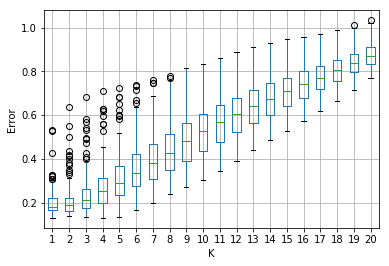

In [50]:
#data = pd.DataFrame({  
#    "k1":k1,"k2":k2,"k3":k3,"k4":k4,"k5":k5,"k6":k6,"k7":k7, "k8":k8, "k9":k9, "k10":k10,"k11":k11,
#})  

data = pd.DataFrame({  
    1:k1, 2:k2, 3:k3, 4:k4, 5:k5, 6:k6, 7:k7, 8:k8, 9:k9, 10:k10, 11:k11,
    12:k12, 13:k13, 14:k14, 15:k15, 16:k16, 17:k17, 18:k18, 19:k19, 20:k20
})  

#draw  
data.boxplot()  
plt.ylabel("Error")  
plt.xlabel("K")  
plt.show()  

### Q3-3 Based on the plot in the previous part (Part I), how does the test error and its uncertainty behave as K increases? 

The plot shows that as k increases the number of outliers reduced and the range of the maximum and minimum value of each box shortened, which indicates the test error increases and the uncertainty decreases.

### Q3-4 
Load Task1B_train.csv and Task1B_test.csv sets. Apply your bootstrapping for KNN regression with K=10 (the neighbourhood size), size = 25 (the size of each subset), and change times = 10, 20, 30,.., 200 (the number of subsets). Now create a boxplot where the x-axis is ‘times’, and the y-axis is the average error (and the uncertainty around it) corresponding to each value of ‘times’. Save the plot in your Jupyter Notebook file for Question 3.

In [53]:
Error_list = []
#array = trainData.index.tolist()

y_actual = testT1B.ix[:,-1:]

for times in range(10,201,10):#range(10,201,10)
    boots = bootstrapping(len(trainT1B),25,times)
    #print (boots)
    Error_list.append([])
    for indx in range(len(boots)):
        idx1 = boots[indx]
        idx1.tolist()
        y_predicted = KNN(trainT1B.iloc[idx1],trainT1B.iloc[idx1],testT1B,10)
        error = Mse(y_predicted, y_actual)
        idx = int(times/10)-1
        #print (idx)
        Error_list[idx].append(error)

/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


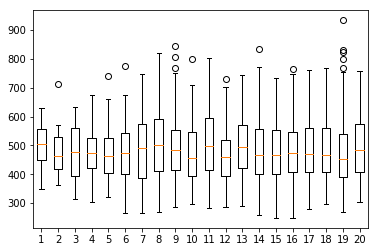

In [56]:
plt.boxplot(Error_list)
plt.show()

### Q3-5 Based on the plot in the previous part (Part IV), how does the test error and its uncertainty behave as the number of subsets in bootstrapping increases? 

Based on the plot 3.4, test error and its uncertainty behave are not much changes as the number of subsets in bootstrapping increases.